
Método: Newton Modificado
Ponto Ótimo: [0.58867465 1.06075506 1.32273992]
Valor Mínimo: 0.19806226419516176
Número de Iterações: 5
Número de Avaliações da Função: 6

Método: BFGS
Ponto Ótimo: [0.60837425 1.09624044 1.3669776 ]
Valor Mínimo: 0.19806226425150814
Número de Iterações: 4
Número de Avaliações da Função: 5

Método: Gradiente-Conjugado
Ponto Ótimo: [0.62081068 1.11865088 1.39491309]
Valor Mínimo: 0.19806226432082236
Número de Iterações: 8
Número de Avaliações da Função: 11


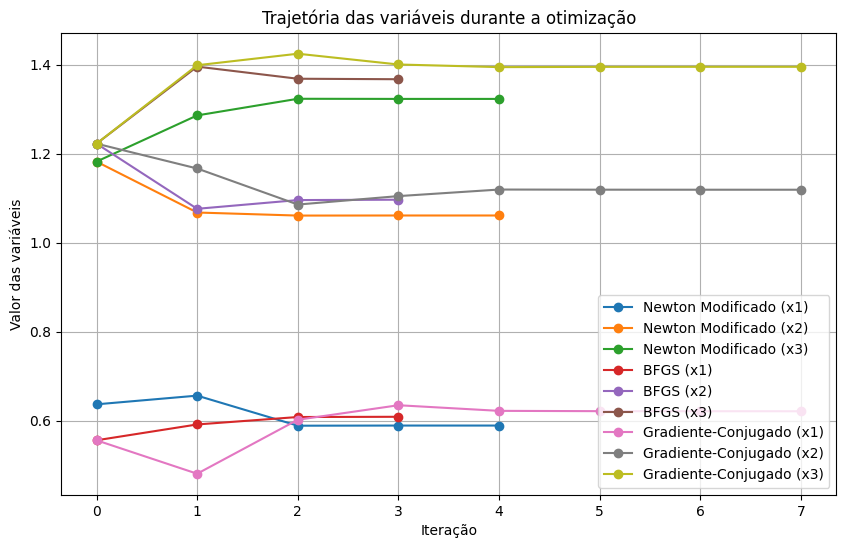

In [4]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

# Matrizes K e M
def get_matrizes(k=1):
    K = k * np.array([[2, -1, 0],
                      [-1, 2, -1],
                      [0, -1, 1]])
    M = np.array([[1, 0, 0],
                  [0, 1, 0],
                  [0, 0, 1]])
    return K, M

# Definição da função objetivo R(X)
def R(X):
    K, M = get_matrizes(k=1)
    X = np.array(X).reshape(-1, 1)
    numerator = (X.T @ K @ X)[0, 0]  # X^T K X
    denominator = (X.T @ M @ X)[0, 0]  # X^T M X
    return numerator / denominator

# Gradiente da função objetivo R(X)
def grad_R(X):
    K, M = get_matrizes(k=1)
    X = np.array(X).reshape(-1, 1)
    numerator_grad = 2 * (K @ X)
    denominator_grad = 2 * (M @ X)
    numerator = (X.T @ K @ X)[0, 0]  # X^T K X
    denominator = (X.T @ M @ X)[0, 0]  # X^T M X
    gradient = (numerator_grad / denominator) - (numerator / (denominator**2)) * denominator_grad
    return gradient.flatten()

# Ponto inicial
x0 = [1, 1, 1]

# Callback para salvar a trajetória
trajectory = []
def callback(x):
    trajectory.append(x.tolist())

# Métodos a serem avaliados
methods = {
    'Newton Modificado': 'Newton-CG',
    'BFGS': 'BFGS',
    'Gradiente-Conjugado': 'CG'
}

# Executar cada método
results = {}
for method_name, method in methods.items():
    print(f"\nMétodo: {method_name}")
    trajectory = []  # Resetar a trajetória

    # Configurar parâmetros específicos para cada método
    if method == 'Newton-CG':
        options = {'maxiter': 100, 'xtol': 1e-6}  
        jac = grad_R  
    else:
        options = {'maxiter': 100}  
        jac = grad_R

    # Executar a minimização
    result = minimize(
        R,
        x0=x0,
        method=method,
        jac=jac,  
        callback=callback,
        tol=1e-5,
        options=options
    )

    # Salvar resultados
    results[method_name] = {
        'Ponto Ótimo': result.x,
        'Valor Mínimo': result.fun,
        'Iterações': result.nit,
        'Avaliações da Função': result.nfev,
        'Trajetória': np.array(trajectory)
    }

    # Exibir resultados
    print("Ponto Ótimo:", result.x)
    print("Valor Mínimo:", result.fun)
    print("Número de Iterações:", result.nit)
    print("Número de Avaliações da Função:", result.nfev)

# Plotar as trajetórias de cada método
plt.figure(figsize=(10, 6))
for method_name, result in results.items():
    trajectory = result['Trajetória']
    if trajectory.size > 0:
        plt.plot(trajectory[:, 0], label=f'{method_name} (x1)', marker='o')
        plt.plot(trajectory[:, 1], label=f'{method_name} (x2)', marker='o')
        plt.plot(trajectory[:, 2], label=f'{method_name} (x3)', marker='o')

plt.title('Trajetória das variáveis durante a otimização')
plt.xlabel('Iteração')
plt.ylabel('Valor das variáveis')
plt.legend()
plt.grid()
plt.show()

